<a href="https://colab.research.google.com/github/OhJin-Soo/code_practice/blob/main/PolynomialFeatures_and_Ridge_regulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'

life = pd.read_csv(file)
print(life.head(3))

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness 1-19 years  Thinness 5-9 years  Income composition of resources  \
0         

In [24]:
print('기대수명 데이터의 개요:')
print(life.describe())

기대수명 데이터의 개요:
              Year  Life expectancy  Adult mortality  Infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.0

In [25]:
print('life 데이터의 컬럼들')
print(life.columns)

life 데이터의 컬럼들
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [26]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

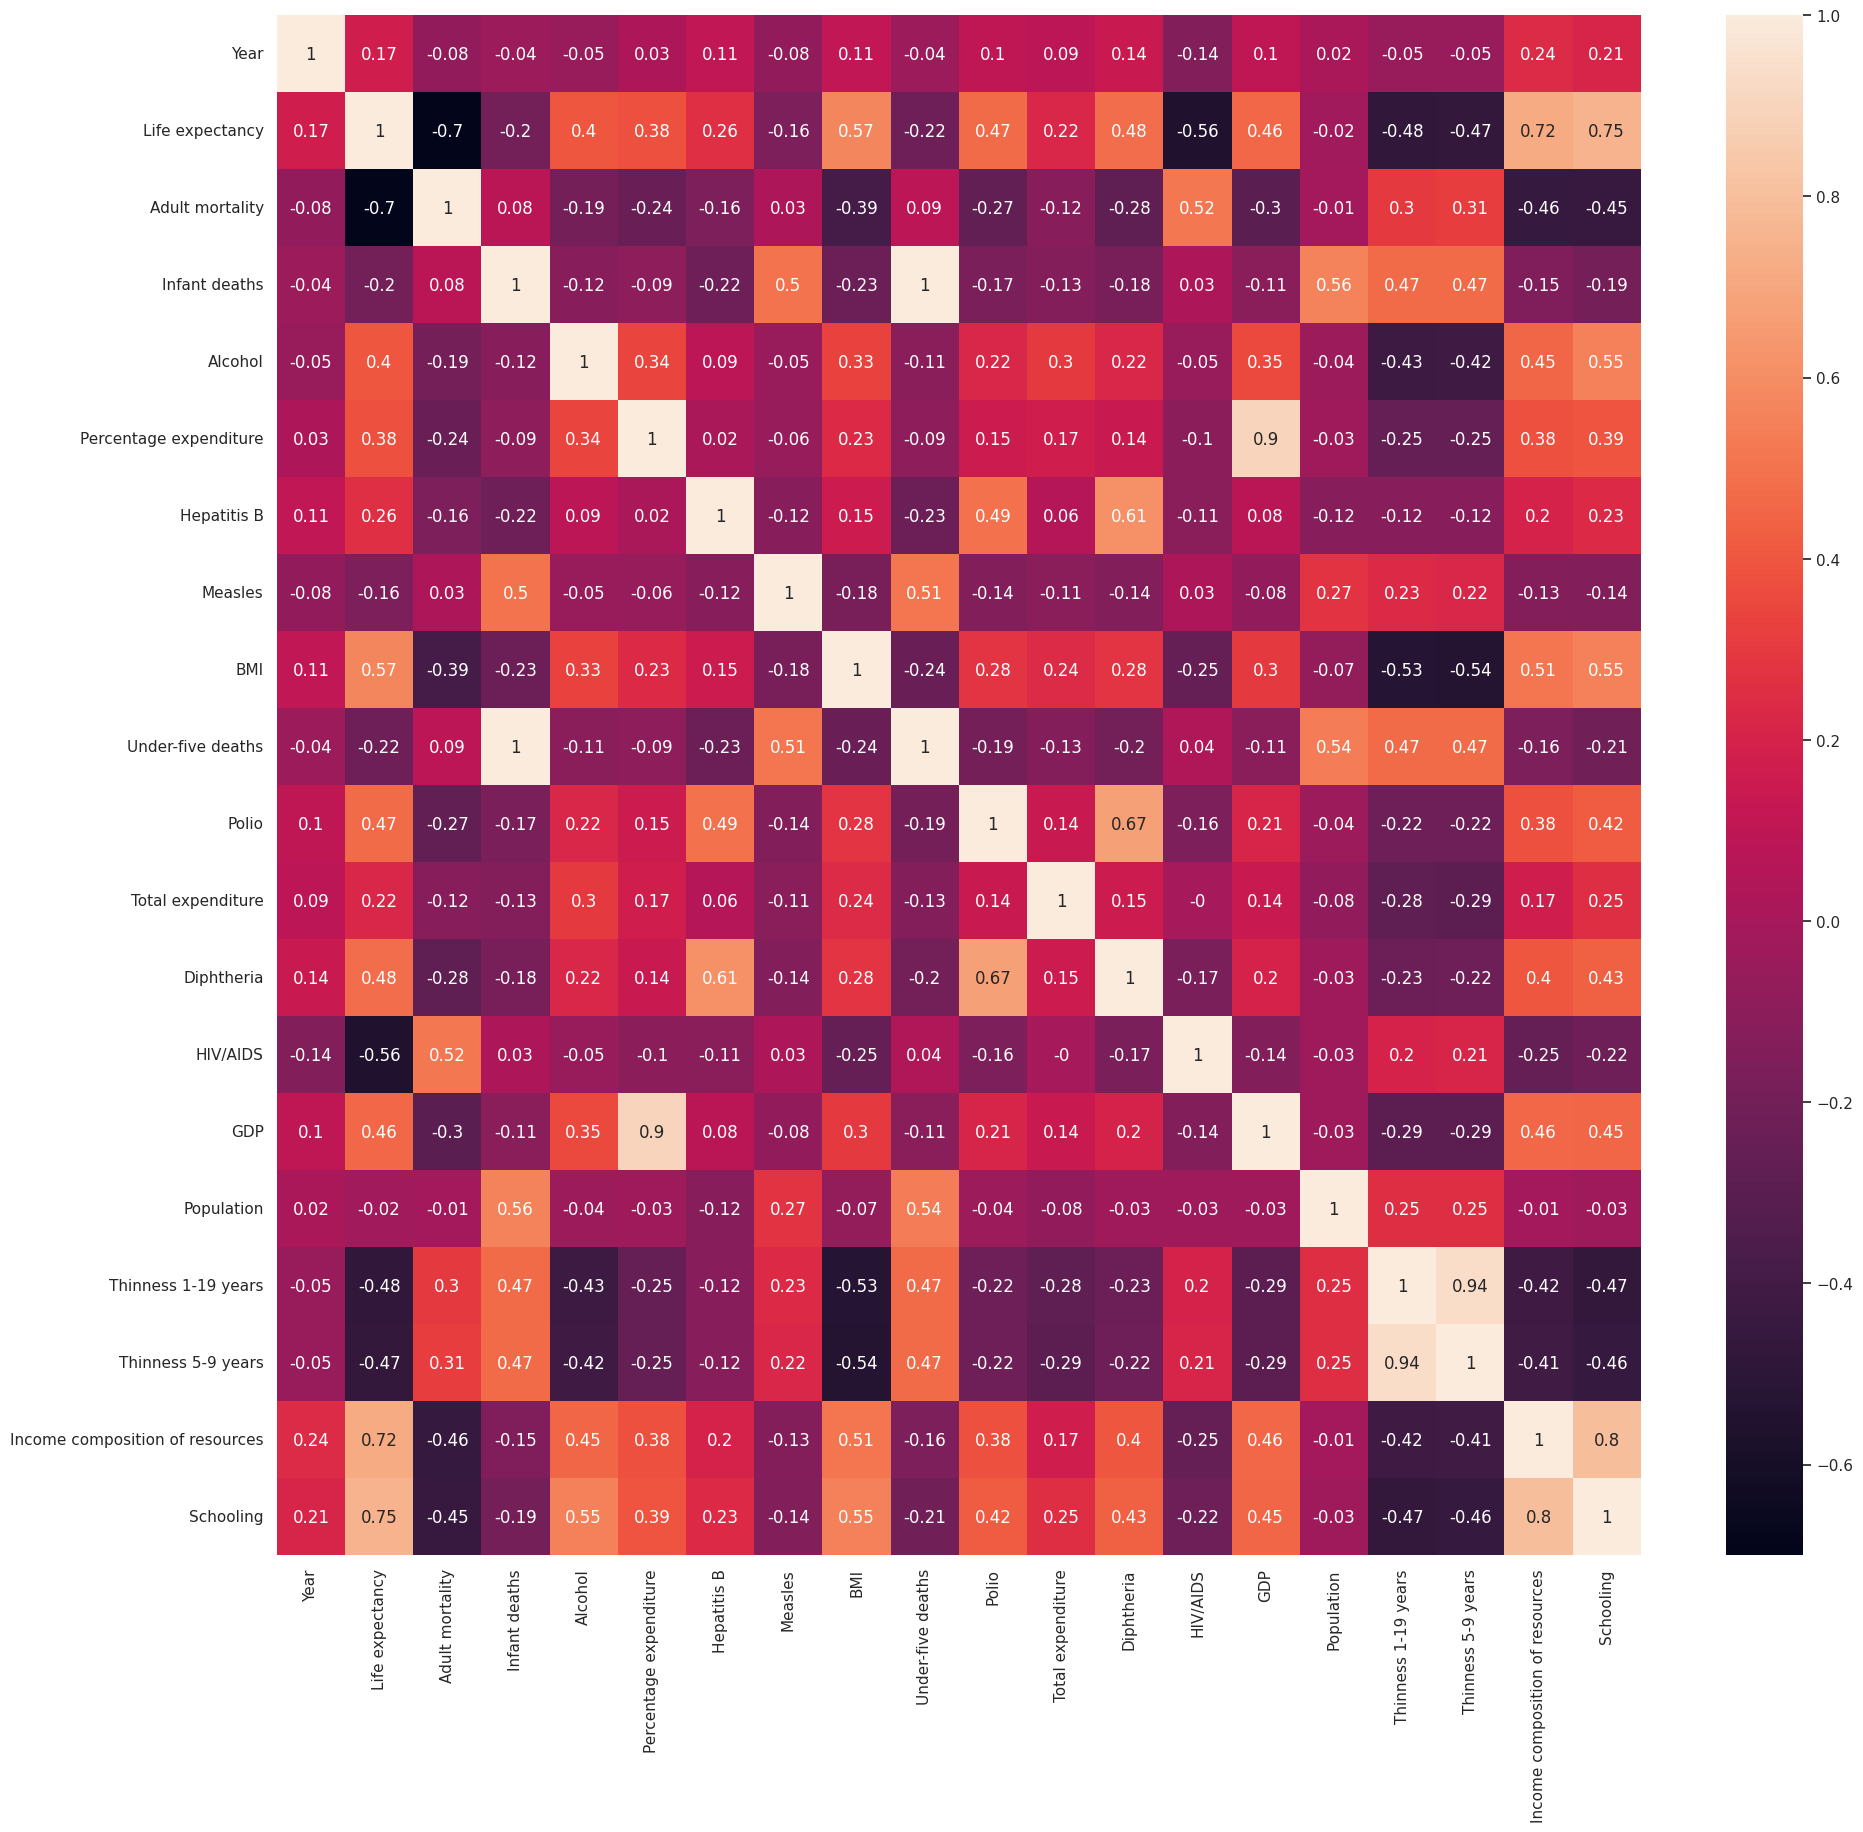

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(22,20)})
life = life.select_dtypes(include=['float64', 'int64'])
correlation_matrix = life.iloc[2:-1].corr().round(2)
sns.heatmap(data = correlation_matrix, annot=True)

In [28]:
print("기대수명과의 상관계수")
print(life.corr().round(3)['Life expectancy'])

기대수명과의 상관계수
Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


In [29]:
import numpy as np
c = life.corr().round(2)['Life expectancy']
c = np.abs(c)
print(c.sort_values(ascending=False)[1:8])

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Thinness 1-19 years                0.48
Diphtheria                         0.48
Name: Life expectancy, dtype: float64


In [30]:
print("Life expectancy와 상관도 순서로 정렬 후 하위 5개의 값")
print(c.sort_values(ascending=False)[-6:-1])

Life expectancy와 상관도 순서로 정렬 후 하위 5개의 값
Under-five deaths    0.22
Total expenditure    0.22
Infant deaths        0.20
Year                 0.17
Measles              0.16
Name: Life expectancy, dtype: float64


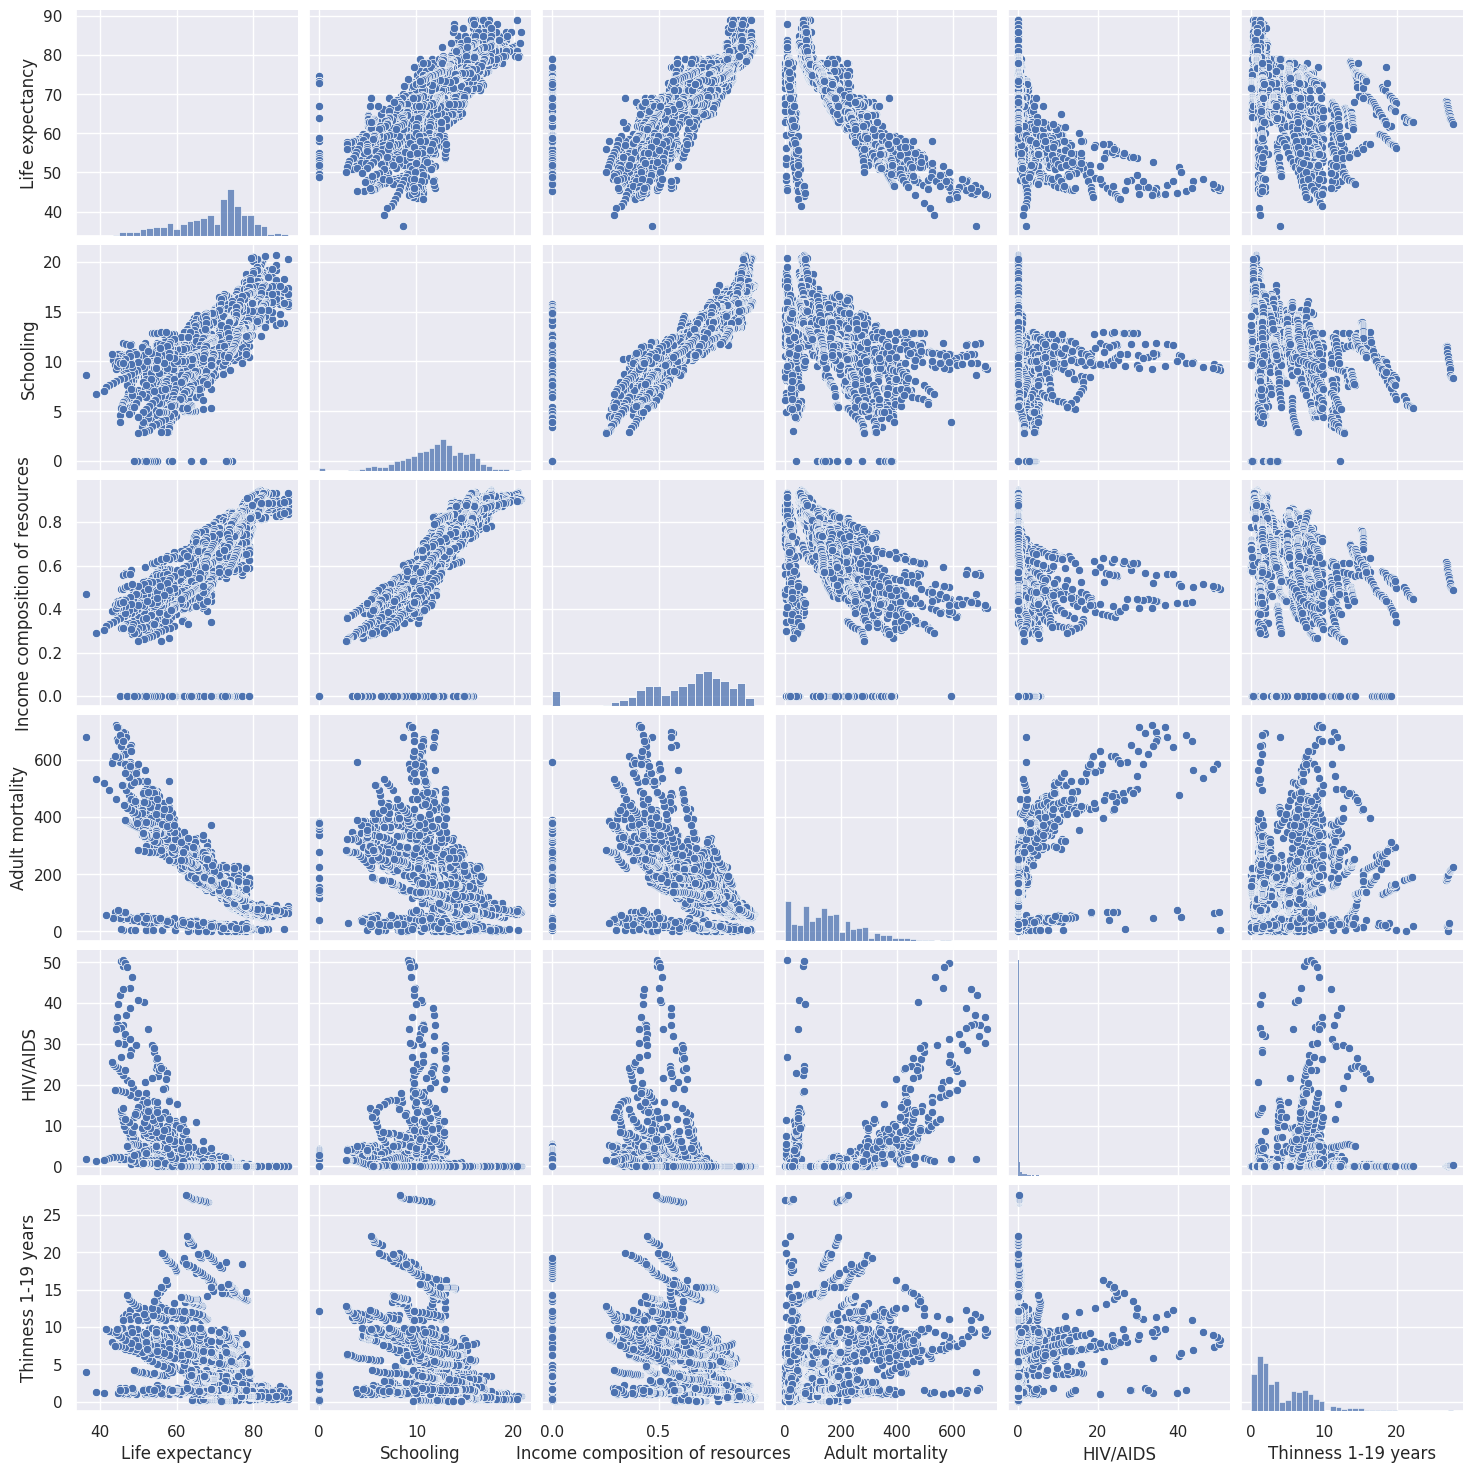

In [31]:
sns.pairplot(life[['Life expectancy', 'Schooling','Income composition of resources','Adult mortality', 'HIV/AIDS','Thinness 1-19 years']])
plt.show()

In [32]:
life[['Life expectancy', 'Schooling','Income composition of resources','Adult mortality', 'HIV/AIDS','Thinness 1-19 years']].isna().sum()

,0
Life expectancy,10
Schooling,163
Income composition of resources,167
Adult mortality,10
HIV/AIDS,0
Thinness 1-19 years,34


In [33]:
life.dropna(inplace=True)
X = life[['Schooling', 'Income composition of resources',
          'Adult mortality', 'HIV/AIDS', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형 회귀 모델의 점수 =', round(regr.score(X_test, y_test), 3))

선형 회귀 모델의 점수 = 0.802


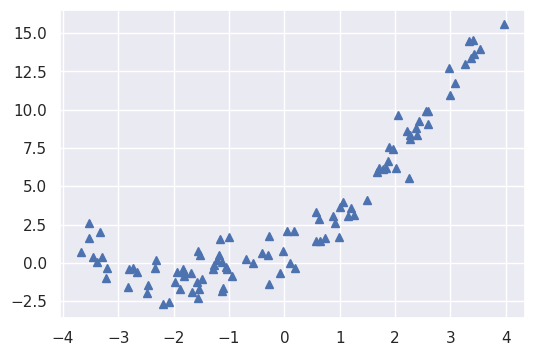

In [35]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 8 * np.random.rand(m, 1) - 4
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m,1)

plt.figure(figsize = (6,4))
plt.plot(X,y, 'b^')

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regr=LinearRegression()
regr.fit(X,y)
print("선형회귀 모델의 점수 =",round(regr.score(X,y),3))
print('선형회귀 모델의 계수와 절편 =', regr.coef_, regr.intercept_)

선형회귀 모델의 점수 = 0.753
선형회귀 모델의 계수와 절편 = [[1.97704769]] [3.22536744]


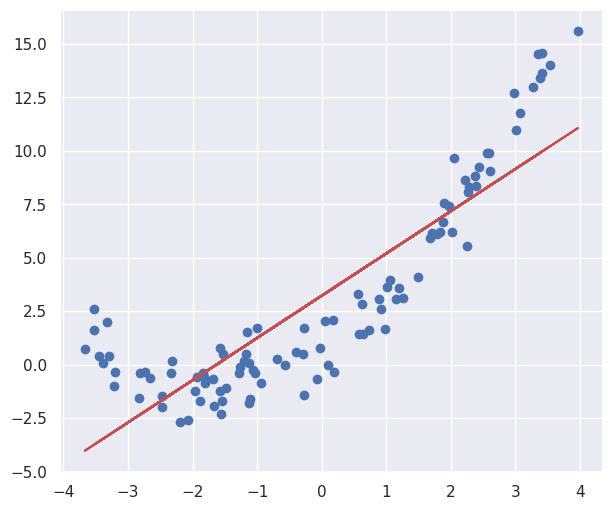

In [37]:
plt.figure(figsize=(7,6))
y_predict = regr.predict(X)
plt.scatter(X,y)
plt.plot(X.flatten(), y_predict, color='r')

In [38]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(2).reshape(-1,1)
print(X)

[[0]
 [1]]


In [39]:
poly = PolynomialFeatures()
X = poly.fit_transform(X)
print(X)

[[1. 0. 0.]
 [1. 1. 1.]]


In [40]:
print(poly.get_feature_names_out())

['1' 'x0' 'x0^2']


In [41]:
print(X.shape)
print(X)

(2, 3)
[[1. 0. 0.]
 [1. 1. 1.]]


In [42]:
print(y)
print(y.shape)

[[ 2.06656587]
 [ 8.3309311 ]
 [ 0.17270022]
 [ 1.68570161]
 [-0.32853497]
 [ 6.17022551]
 [ 0.08492964]
 [ 6.66588986]
 [13.99879346]
 [ 0.06665195]
 [ 2.59541686]
 [ 0.73838621]
 [-1.68648797]
 [ 3.9813999 ]
 [13.39157285]
 [ 8.35241791]
 [ 6.18384047]
 [ 0.39218619]
 [12.72112151]
 [11.7637775 ]
 [15.6143831 ]
 [-0.87327482]
 [-0.32269197]
 [ 3.32511335]
 [ 0.18541562]
 [ 0.51556369]
 [-0.33722572]
 [-1.62650767]
 [-0.02991542]
 [ 3.58550674]
 [ 0.27824155]
 [-1.9138616 ]
 [-0.39861418]
 [-1.68736583]
 [ 1.64418925]
 [-2.67673557]
 [12.99760683]
 [ 1.72588549]
 [-1.23402003]
 [ 1.45707817]
 [-0.5979326 ]
 [ 9.88573432]
 [13.65528943]
 [-1.07134023]
 [-1.56291008]
 [-0.8642767 ]
 [ 6.10144751]
 [ 0.76111244]
 [ 0.6143976 ]
 [ 5.56549524]
 [ 6.22462266]
 [10.9916995 ]
 [14.52235703]
 [ 3.62424653]
 [14.58570652]
 [ 2.59782571]
 [ 8.810305  ]
 [-2.5752065 ]
 [ 0.79012392]
 [ 0.51509466]
 [-1.97422918]
 [-1.01697862]
 [-1.40738657]
 [-0.37280298]
 [-0.67630955]
 [-0.58547582]
 [ 1.42988

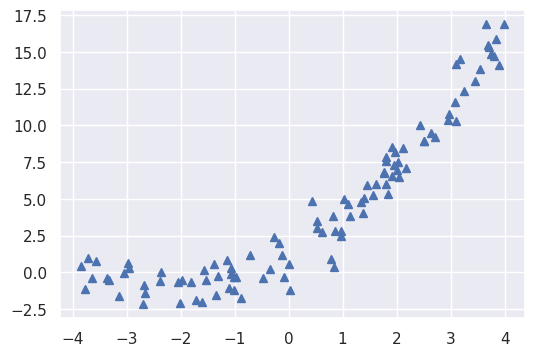

In [43]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 8 * np.random.rand(m, 1) - 4
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m,1)

plt.figure(figsize = (6,4))
plt.plot(X,y, 'b^')

In [44]:
poly_features = PolynomialFeatures(degree = 2,
                                   include_bias = False)
X_poly = poly_features.fit_transform(X)
regr = LinearRegression()
regr.fit(X_poly, y)
print("다항 회귀 모델의 점수 =", round(regr.score(X_poly, y),3))
print("다항 회귀 모델의 계쑤 =", regr.coef_, '절편 =', regr.intercept_)

다항 회귀 모델의 점수 = 0.964
다항 회귀 모델의 계쑤 = [[2.02063097 0.46134997]] 절편 = [1.25767743]


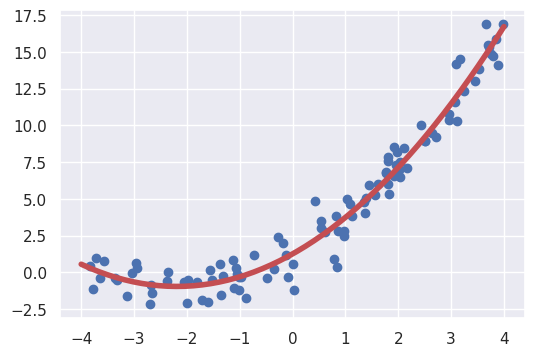

In [45]:
domain = np.linspace(-4,4,50).reshape(-1,1)
domain_2 = poly_features.fit_transform(domain)
plt.figure(figsize=(6,4))
y_predict = regr.predict(domain_2)
plt.scatter(X,y)
plt.plot(domain, y_predict, color='r', linewidth=4)

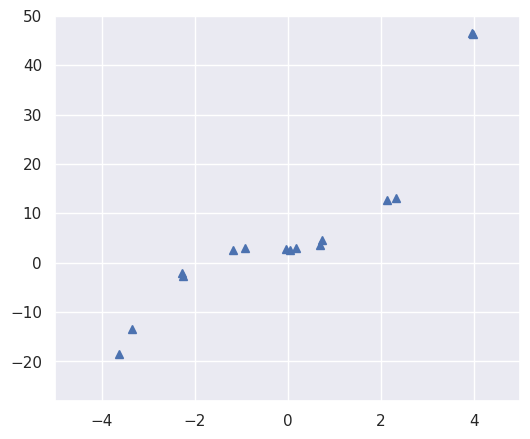

In [46]:
m = 20
X = 8 * np.random.rand(m,1) - 4
y = .5 * X **3 + .5 *X**2 + X+3 +np.random.randn(m,1)

X_train, X_test, y_train, y_test = train_test_split(X,y)

plt.figure(figsize = (6,5))
plt.xlim(-5,5); plt.ylim(-28,50)
plt.plot(X_train, y_train, "b^")

In [47]:
poly_features = PolynomialFeatures(degree =20,
                                   include_bias=False)
X_poly = poly_features.fit_transform(X_train)
regr = LinearRegression()
regr.fit(X_poly, y_train)
print("다항 회귀 모델의 점수 =",round(regr.score(X_poly, y_train),3))
print('다항 회귀 모델의 계쑤 =', regr.coef_)
print('절편 = ', regr.intercept_)

다항 회귀 모델의 점수 = 1.0
다항 회귀 모델의 계쑤 = [[ 2.63720732e+00 -9.99679373e+00 -9.33214637e+00  8.86548171e+00
   7.38374903e+00  1.29440338e+01  1.14030050e+01  9.23443787e+00
   1.00989997e+01  3.89490570e+00  4.57974803e+00 -8.96285125e-02
  -4.85394026e+00 -1.39774666e+00  1.00395476e+00  3.59860206e-01
  -7.23230223e-02 -2.95738901e-02  1.68829820e-03  7.84866200e-04]]
절편 =  [2.76708493]


In [48]:
X_poly = poly_features.fit_transform(X_test)
print('테스트 데이터에 대한 모델의 점수 =', regr.score(X_poly, y_test))

테스트 데이터에 대한 모델의 점수 = -6816199327.660029


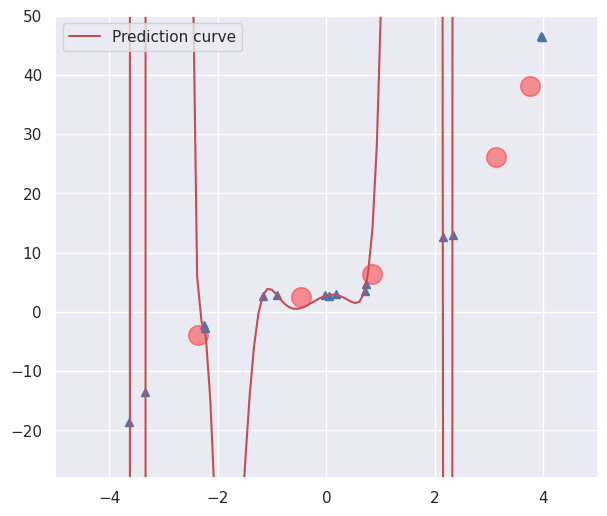

In [49]:
X_new = np.linspace(-4, 4, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

plt.figure(figsize=(7,6))
plt.xlim(-5,5); plt.ylim(-28,50)

plt.plot(X_train, y_train, 'b^')
plt.scatter(X_test, y_test, c='red', s=200, alpha =0.4)
plt.plot(X_new, y_new, 'r-', label="Prediction curve")
plt.legend()

In [65]:
m = 20
X = 8 * np.random.rand(m,1) - 4
y = .5 + X ** 3 + .5 * X **2 + X +3 + np.random.randn(m,1)

X_train, X_test, y_train, y_test = train_test_split(X,y)
poly_features = PolynomialFeatures(degree = 20,
                                   include_bias = False)
X_train_pl = poly_features.fit_transform(X_train)
X_test_pl = poly_features.fit_transform(X_test)

regr = LinearRegression()
regr.fit(X_train_pl, y_train)

print('훈련 데이터 점수 =', round(regr.score(X_train_pl, y_train),3))
print("테스트 데이터의 점수 =", round(regr.score(X_test_pl, y_test),3))

훈련 데이터 점수 = 1.0
테스트 데이터의 점수 = -863347039093.944


In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_pl)
train_scaled, test_scaled = ss.transform(X_train_pl), ss.transform(X_test_pl)
ss.fit(y_train)
y_train_scaled, y_test_scaled = ss.transform(y_train), ss.transform(y_test)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train_scaled)
print("훈련 데이터 점수 =", ridge.score(train_scaled, y_train_scaled))
print("테스트 데이터 점수 =", ridge.score(test_scaled, y_test_scaled))

훈련 데이터 점수 = 0.9606581989084174
테스트 데이터 점수 = 0.5305081638294122


In [63]:
print(train_scaled.shape, y_test_scaled.shape)

(15, 20) (5, 1)


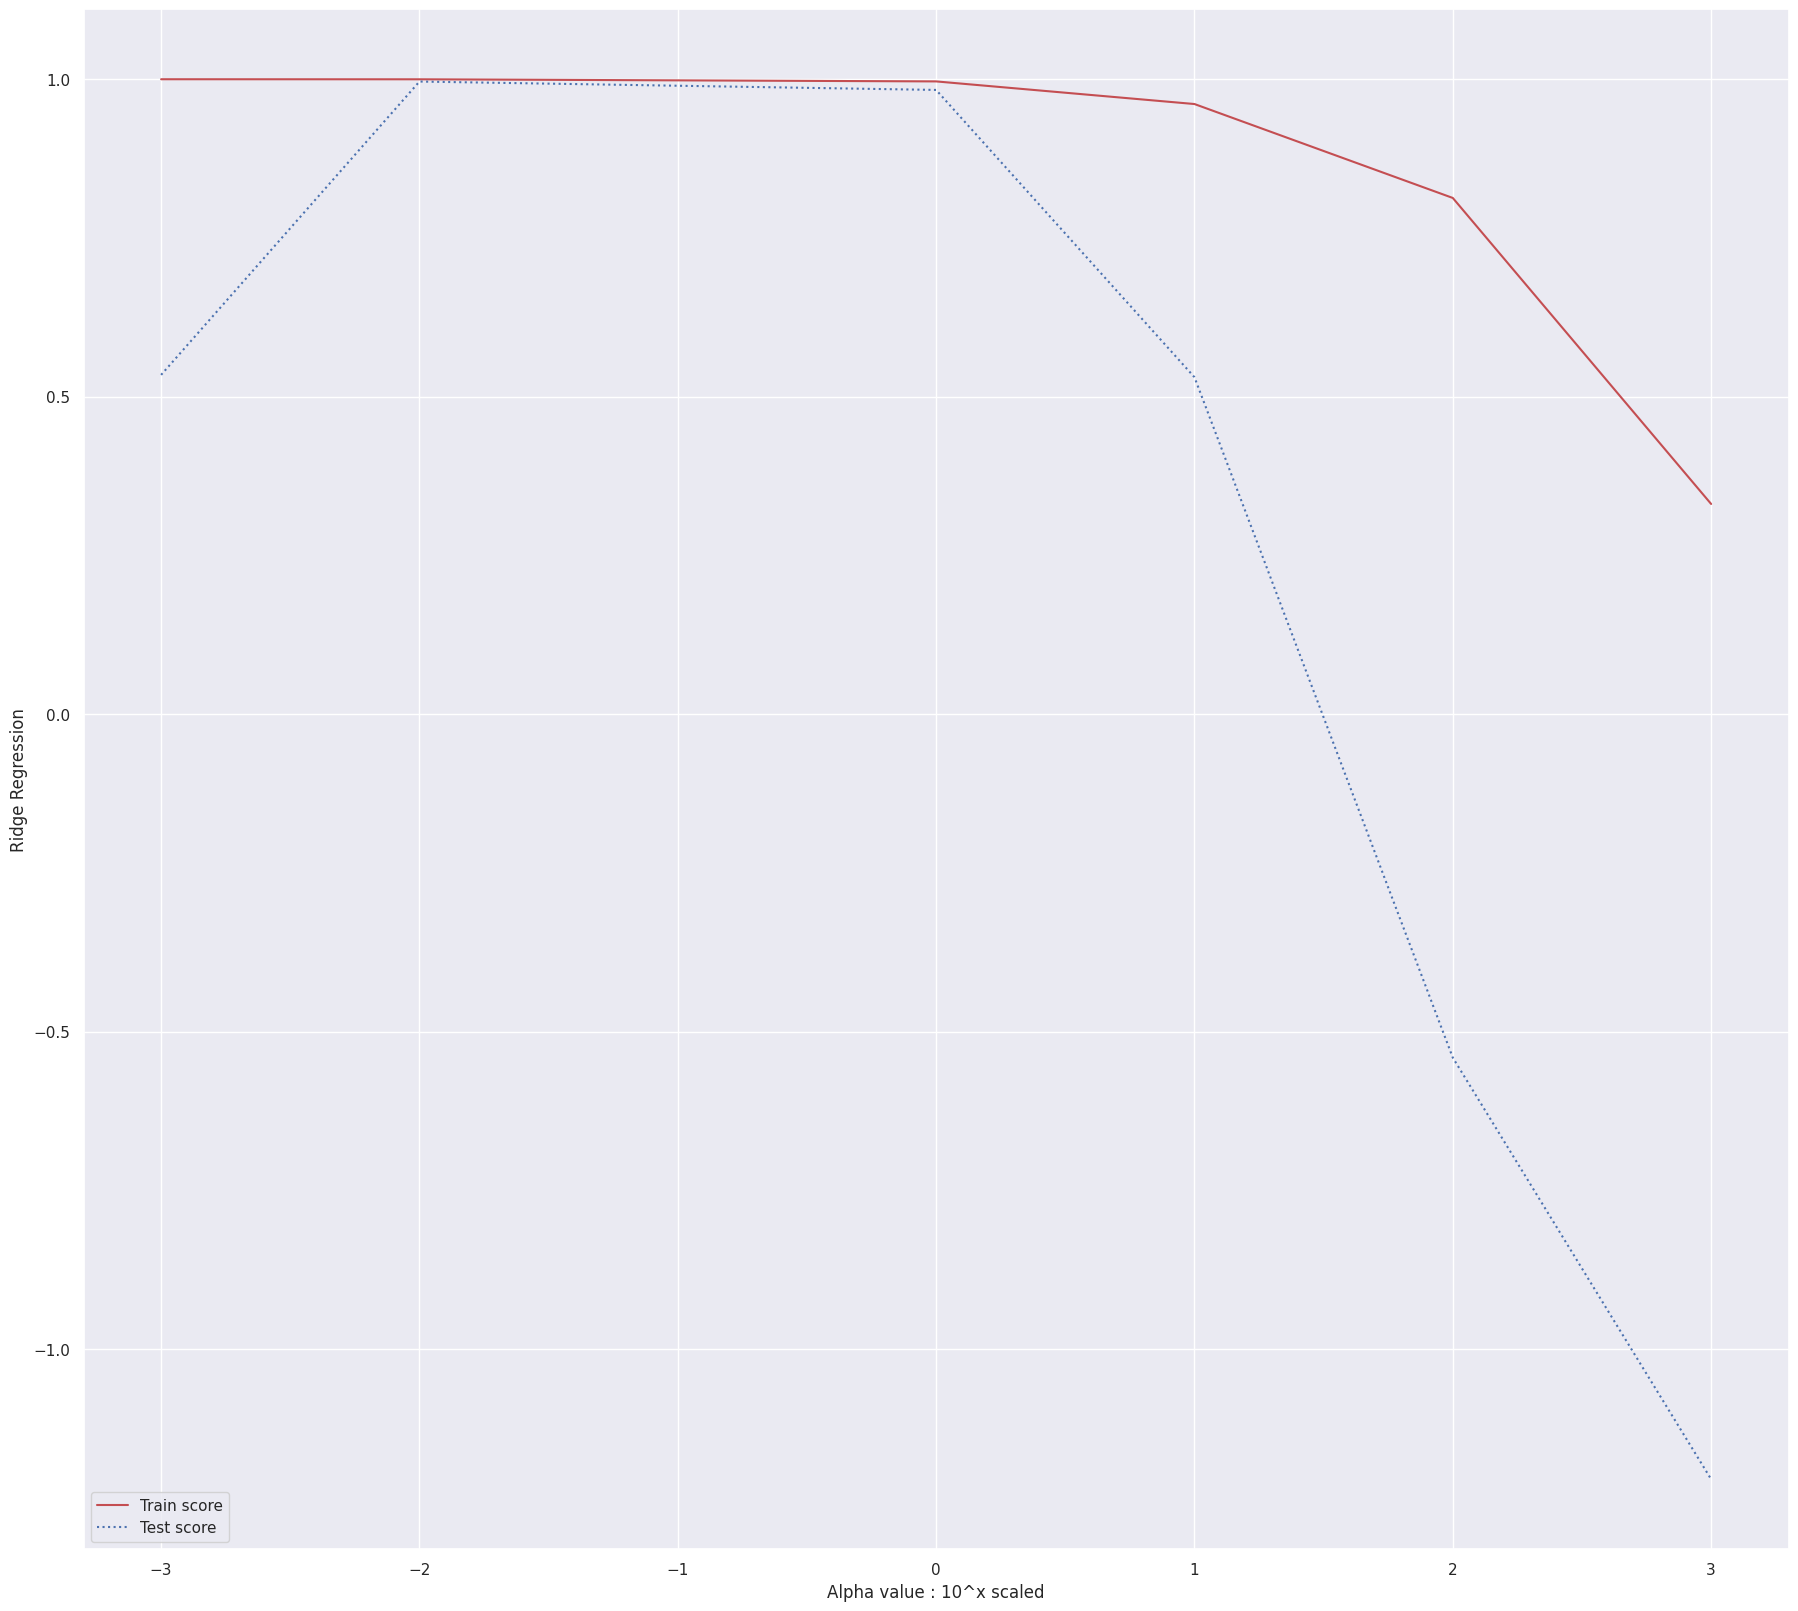

In [68]:
train_scores = []
test_scores = []
alpha_values = [0.001, 0.01, 1, 10, 100, 1000]
for a in alpha_values:
  ridge = Ridge(alpha = a)
  ridge.fit(train_scaled, y_train_scaled)
  train_scores.append(ridge.score(train_scaled, y_train_scaled))
  test_scores.append(ridge.score(test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_values), train_scores, 'r-', label = 'Train score')
plt.plot(np.log10(alpha_values), test_scores, 'b:', label = 'Test score')
plt.xlabel('Alpha value : 10^x scaled')
plt.ylabel('Ridge Regression')
plt.legend(loc="lower left")

소감 : 이번 장의 핵심은 다항회귀가 가능하다는 점. 과적합을 방지하기 위해 릿지 회귀 (규제) 를 사용한다는 점.